昔のDVDの待機画面をイメージして、楕円形が画面内を動くプログラムを作りました。
楕円は壁で跳ね返るたびに色が変わります。

動作のスピードの関係からstrideを１にしていますが、0.1ぐらいにすると壁にくいこむことがなくなります。



*   楕円を書くプログラムを作成しました。
*   中心の動きをプログラムしました。
*   合わせてアニメーションにしました。


伝わらないかもしれないと思って元ネタを探したのですが、楕円のものはどうしても見つかりませんでした。
https://www.youtube.com/watch?v=5mGuCdlCcNM
これの楕円版だと考えていただけると幸いです。



In [ ]:
!pip install -U ita --user
import os, sys
sys.path.append(os.path.expanduser('~/.local/lib/python' + '.'.join(str(x) for x in sys.version_info[:2]) + '/site-packages'))
import ita

In [ ]:
import random

In [ ]:
def distance(x1, y1, x2, y2): # 点 (x1, y1)と(x2, y2)の距離
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [ ]:
def draw_ellips(r, s, focus_x, focus_y, color, image):
  #楕円を書く
    for i in range(0, len(image)):
        for j in range(0, len(image[i])):
            if distance(i,j,focus_y, focus_x-s ) + distance (i,j,focus_y, focus_x+s )< r:
                image[i][j] = color
    return image

In [ ]:
def step(x,y,vel_x, vel_y, stride, color):
  #速度などが指定された時の中心の動き
  x = x + vel_x * stride
  y = y + vel_y * stride
  return [x, y, vel_x, vel_y, color]

In [ ]:
def motion(x, y, vel_x, vel_y):
  #中心の動き
  stride = 1
  color = [random.random(), random.random(),random.random()]
  orbit = [x, y, vel_x, vel_y, color]
  result = []#結果格納
  for i in range(0, 200):#端に触れたら折り返す、その度に色を変える
    if orbit[0] <= 20:
      orbit[2] = 20
      orbit[4] = [random.random(), random.random(),random.random()]
    if orbit[0] >= 380:
      orbit[2] = -20
      orbit[4] = [random.random(), random.random(),random.random()]
    if orbit[1] <= 12:
      orbit[3] = 10
      orbit[4] = [random.random(), random.random(),random.random()]
    if orbit[1] >= 188:
      orbit[3] = -10
      orbit[4] = [random.random(), random.random(),random.random()]
    orbit = step(orbit[0], orbit[1], orbit[2], orbit[3], stride, orbit[4])
    result.append(orbit)
  return result

In [ ]:
def motion_dvd(x, y, vel_x, vel_y):
  result = motion(x, y, vel_x, vel_y)
  images = ita.array.make1d(len(result))
  for i in range(0, len(result)):
    image = ita.array.make3d(200, 400, 3)
    focus_x = result[i][0]
    focus_y = result[i][1]
    color = result[i][4]
    draw_ellips(40, 16, focus_x, focus_y, color, image)
    images[i]= image
  return images

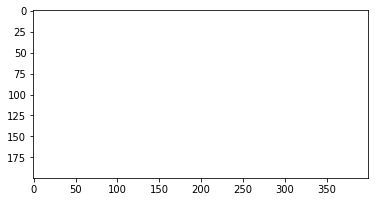

In [ ]:
ani = motion_dvd(100, 100, 10, 20)
ita.plot.animation_show(ani)